In [1]:
# 필요 라이브러리 마운트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#구글드라이브 마운트
#from google.colab import drive
#drive.mount('/content/drive')


In [3]:
# 파이썬 경고를 비활성화 해주는 코드 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 데이터 불러오기 

bike_train_df = pd.read_csv('../input/bike-sharing-demand/train.csv')
bike_test_df = pd.read_csv('../input/bike-sharing-demand/test.csv')
print(bike_train_df.shape)
bike_train_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print(bike_test_df.shape)
bike_test_df.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


12개 칼럼, 10886 레코드

Datetime: 날짜

season: 1=봄, 2=여름 ,3=가을, 4=겨울

holiday: 1=토, 일요일의 주말을 제외한 국경일 등의 휴일 , 0= 휴일이 아닌날

workingday: 1= 토, 일요일의 주말 및 휴일이 아닌 주중, 0= 주말 및 휴일

weather: 1= 맑음, 약간 구름 낀 흐림 , 2=안개, 안개+흐림 ,3= 가벼운 눈 , 가벼운 비+ 천둥, 4= 심한 눈/비, 천둥/번개 

temp: 온도(섭씨)

atemp: 체감온도(섭씨)

humidity: 상대습도

windspeed: 풍속

casual: 사전에 등록되지 않은 사용자가 대여한 횟수

registered: 사전에 등록된 사용자가 대여한 횟수

count : 대여횟수


In [5]:
# 트레인데이터 속성 
# 결측치 없음 , datetime 만 object 속성으로 가공필요 
bike_train_df.info()
bike_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

<AxesSubplot:>

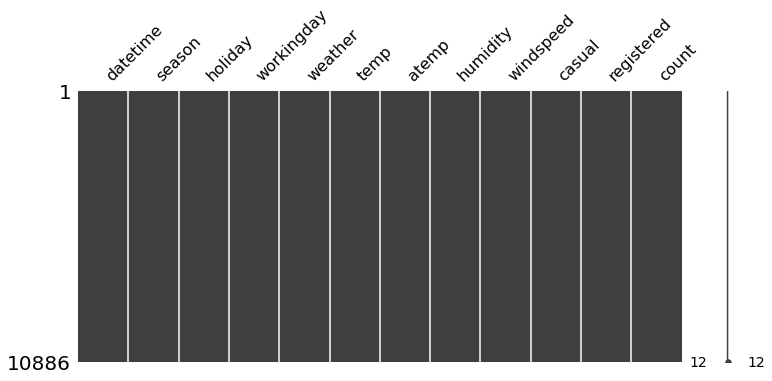

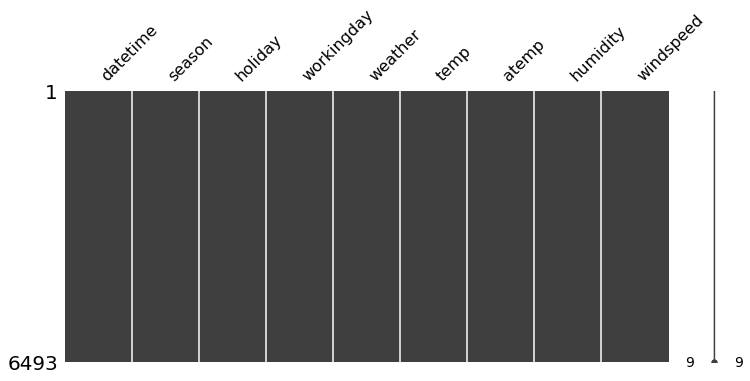

In [6]:
# 결측치 확인하는 라이브러리 missingno 흰색선이 보일시 결측치 
import missingno as msno
msno.matrix(bike_train_df, figsize=(12,5))
msno.matrix(bike_test_df, figsize=(12,5))

In [7]:
# 문자열을 datetime 타입으로 변경
bike_train_df['datetime']= bike_train_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
# 신규 컬럼으로 년, 월 , 일, 시간이 추가됨
bike_train_df['year']= bike_train_df.datetime.apply(lambda x : x.year)
bike_train_df['month']= bike_train_df.datetime.apply(lambda x : x.month)
bike_train_df['day']= bike_train_df.datetime.apply(lambda x : x.day)
bike_train_df['hour']= bike_train_df.datetime.apply(lambda x : x.hour)
bike_train_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [8]:
# 문자열을 datetime 타입으로 변경
bike_test_df['datetime']= bike_test_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
# 신규 컬럼으로 년, 월 , 일, 시간이 추가됨
bike_test_df['year']= bike_test_df.datetime.apply(lambda x : x.year)
bike_test_df['month']= bike_test_df.datetime.apply(lambda x : x.month)
bike_test_df['day']= bike_test_df.datetime.apply(lambda x : x.day)
bike_test_df['hour']= bike_test_df.datetime.apply(lambda x : x.hour)
bike_test_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


In [9]:
# 년, 월, 일, 시간 추가로 datetime 컬럼 삭제  및 가입자별 대여현황 삭제(상관도가 너무높아 예측성능을 저해함)
drop_columns = ['datetime','casual','registered']
bike_train_df.drop(drop_columns, axis=1, inplace=True)

In [10]:
drop_columns = ['datetime']
bike_test_df.drop(drop_columns, axis=1, inplace=True)

탐색적 데이터 분석(EDA)

<AxesSubplot:>

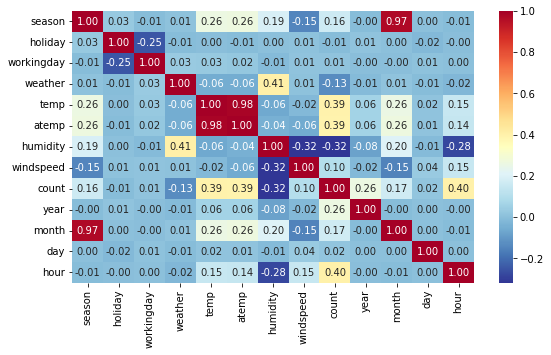

In [11]:
corr = bike_train_df.corr()
plt.figure(figsize = (9,5))
sns.heatmap(corr , cmap = 'RdYlBu_r' , annot=True , fmt = '.2f')

mean rentals in fall : 234.417124039517


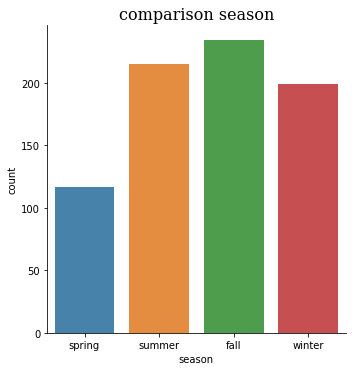

In [12]:
sns.catplot(data = bike_train_df.replace({'season':{1:'spring' , 2:'summer' , 3:'fall' , 4:'winter'}} , inplace = False)\
           , x = 'season' , y = 'count' , kind = 'bar' , ci = None ,  alpha = 0.9)
plt.title('comparison season' , fontdict = {'family':'serif' , 'size':16})
print( "mean rentals in fall :", bike_train_df[bike_train_df['season'] == 3]['count'].mean())

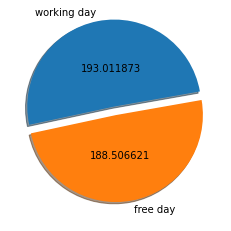

In [13]:
# mrw = mean rentals on working day
# mrf = mean rentals on free day

mrw = bike_train_df[bike_train_df['workingday'] == 1]['count'].mean()
mrf = bike_train_df[bike_train_df['workingday'] == 0]['count'].mean()

plt.pie([ mrw , mrf ] , labels = ['working day' , 'free day'] , explode = [0.1,0] , startangle = 10 , shadow = True)
plt.text(-0.4,0.5,'%f'%(mrw))
plt.text(-0.3,-0.5,'%f'%(mrf))
plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

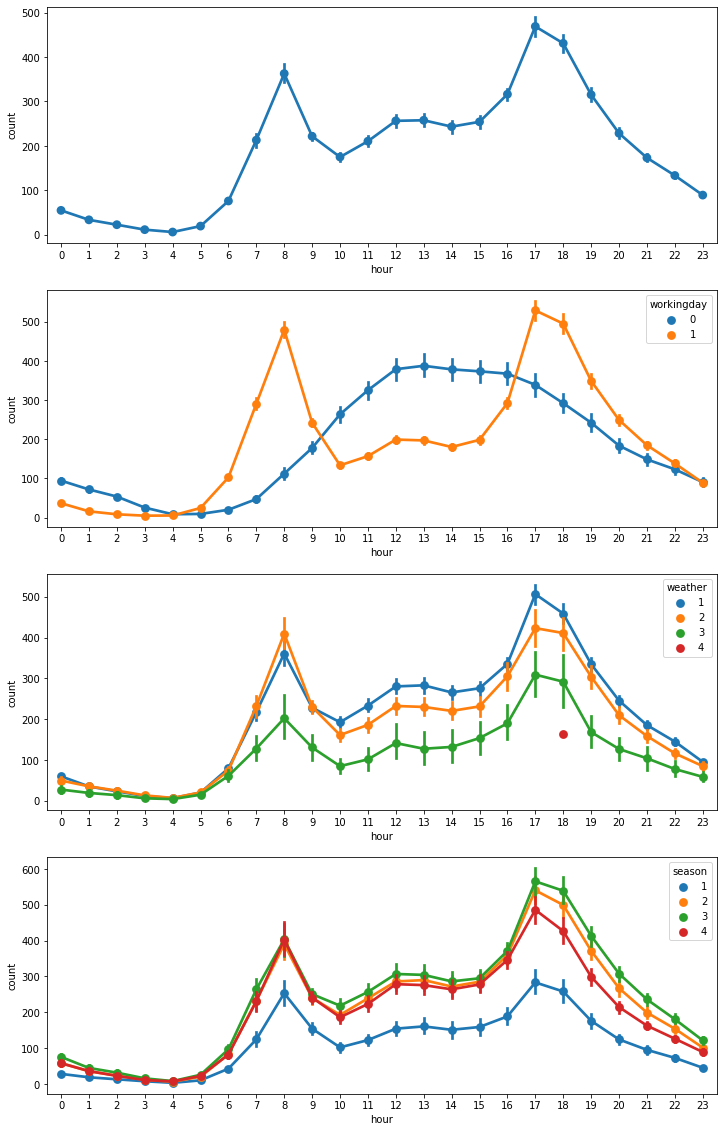

In [14]:
fig, (ax1, ax2, ax3, ax4)=plt.subplots(nrows=4)
fig.set_size_inches(12,20)

sns.pointplot(data=bike_train_df, x="hour", y="count", ax=ax1)
sns.pointplot(data=bike_train_df, x="hour", y="count",hue='workingday' ,ax=ax2)
sns.pointplot(data=bike_train_df, x="hour", y="count",hue='weather' ,ax=ax3)
sns.pointplot(data=bike_train_df, x="hour", y="count",hue='season' ,ax=ax4)

In [15]:
# 기술통계뿐석 
bike_train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,23.000000


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

y_target=bike_train_df['count']
X_features=bike_train_df.drop(['count'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
  log_y= np.log1p(y)
  log_pred= np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle 

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y, pred)
  mae_val = mean_absolute_error(y, pred)
  print('RMSLE: {0:.3f}, RMSE: {1:.3f},MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred= lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.900,MAE: 105.924


In [19]:
def get_top_error_data(y_test, pred, n_tops=5):
  result_df=pd.DataFrame(y_test.values, columns=['real_count'])
  result_df['predicted_count']= np.round(pred)
  result_df['diff']= np.abs(result_df['real_count']-result_df['predicted_count'])

  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

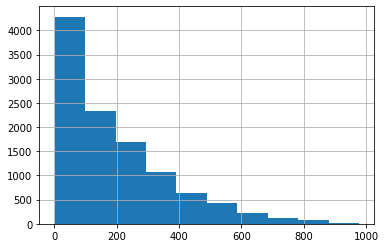

In [20]:
y_target.hist()

<AxesSubplot:>

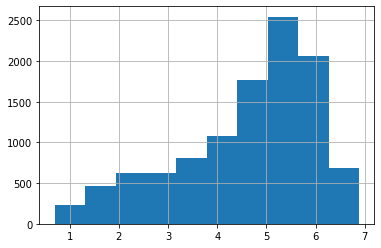

In [21]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [22]:
y_target_log= np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3,random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)

pred_exp= np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594,MAE: 109.286


<AxesSubplot:>

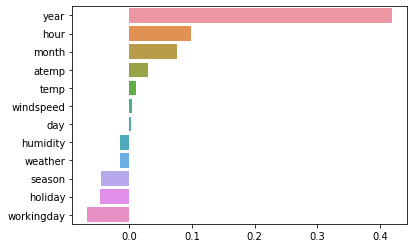

In [23]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [24]:
X_features_ohe = pd. get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1 :
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###',model.__class__.__name__,'###')
  evaluate_regr(y_test, pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg ]:
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688,MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529,MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219,MAE: 72.803


<AxesSubplot:>

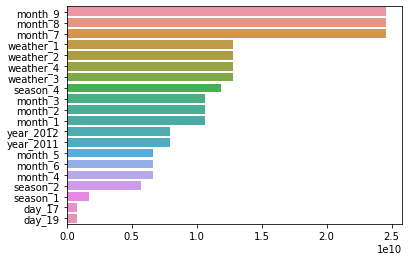

In [26]:
coef=pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y= coef_sort.index)

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=50)
gbm_reg = GradientBoostingRegressor(n_estimators=50)
xgb_reg = XGBRegressor(n_estimators=50)
lgbm_reg = LGBMRegressor(n_estimators=50)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.360, RMSE: 51.865,MAE: 31.762
### GradientBoostingRegressor ###
RMSLE: 0.621, RMSE: 126.684,MAE: 78.591
### XGBRegressor ###
RMSLE: 0.354, RMSE: 57.590,MAE: 35.152
### LGBMRegressor ###
RMSLE: 0.371, RMSE: 64.670,MAE: 40.203


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

# GridSearchCv를 이용한 하이퍼 파라미터.
tuned_parameters = {'n_estimators': [100,200,300,500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [2, 3, 4]}

rf_reg = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1, verbose=1)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RandomForestRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

rf_reg.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 13.7min finished


RandomForestRegressor RMSLE: 0.3563488110314025


{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 200}

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(7620, 73)
(7620,)
(3266, 73)


In [30]:
X_train = bike_train_df.drop(['count'], axis=1)
y_train = bike_train_df['count']
X_test = bike_test_df

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int64  
 9   month       6493 non-null   int64  
 10  day         6493 non-null   int64  
 11  hour        6493 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 608.8 KB


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  hour        10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1020.7 KB


In [33]:
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)  # GridSearchCv로 최적의 파라미터 적용된 모델로 예측처리.

pred_exp = pred

print(pred[0:10])

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.9min finished


[ 13.10445238   5.6625       5.531        3.47795238   2.64211905
   8.33966667  35.42883333  87.33683333 192.25466667 119.42216667]


In [34]:
submission = pd.read_csv('../input/bike-sharing-demand/sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [35]:
submission.loc[:, 'count'] = pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,13.104452
1,2011-01-20 01:00:00,5.662500
2,2011-01-20 02:00:00,5.531000
3,2011-01-20 03:00:00,3.477952
4,2011-01-20 04:00:00,2.642119
...,...,...
6488,2012-12-31 19:00:00,312.557583
6489,2012-12-31 20:00:00,209.193833
6490,2012-12-31 21:00:00,142.335000
6491,2012-12-31 22:00:00,114.352833


In [36]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6493 non-null   object 
 1   count     6493 non-null   float64
dtypes: float64(1), object(1)
memory usage: 101.6+ KB


In [37]:
submission.to_csv('submission.csv', index=False)